TLDR: I've heard good things about HDBSCAN, that it deals with strange geometries well and that it runs at good scale.

It does seem to scale well.

I'm getting some interesting plots coming out,
some indication that regular behaviour (not clumpy) does lead to higher CLV.

I'm going to park this and come back maybe.

In [10]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from scipy.stats import itemfreq
import hdbscan


In [2]:
import sys
sys.path.append("../")

from customercentric import dataprocessing

In [3]:
df = dataprocessing.read_cdwow("../data/cdwow/CDNOW_master.txt")

In [4]:
summary = dataprocessing.summarise_users(
    df,
    df.date.max()
)

100%|██████████| 23570/23570 [00:41<00:00, 567.04it/s]


In [5]:
summary_to_fit = (
    summary
    .fillna(0)
    .drop("total_dollars", axis=1)
)

In [6]:
projection = TSNE().fit_transform(summary_to_fit)


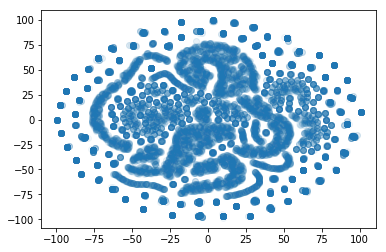

In [7]:
plt.scatter(*projection.T, alpha=0.05)


In [11]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=100, min_samples=30)
clusterer.fit(projection)

/home/ewann/dev/customer-centric-ds/venv/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/home/ewann/dev/customer-centric-ds/venv/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/home/ewann/dev/customer-centric-ds/venv/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/home/ewann/dev/customer-centric-ds/venv/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)


HDBSCAN(algorithm='best', allow_single_cluster=False, alpha=1.0,
    approx_min_span_tree=True, cluster_selection_method='eom',
    core_dist_n_jobs=4, gen_min_span_tree=False, leaf_size=40,
    match_reference_implementation=False, memory=Memory(location=None),
    metric='euclidean', min_cluster_size=100, min_samples=30, p=None,
    prediction_data=False)

In [12]:
summary = summary.assign(cluster = clusterer.labels_)

summary.groupby("cluster").agg({
    "cluster": "size",
    "recency": "mean",
    "frequency": "mean",
    "tenure": "mean",
    "clumpiness": "mean",
    "number_purchases": "mean",
    "total_dollars": "mean",
})

,cluster,recency,frequency,tenure,clumpiness,number_purchases,total_dollars
cluster,,,,,,,
-1,5877,497.211843,1.055470,1.580058,1177.237677,1.588566,24.919435
0,446,505.022422,1.000000,0.000000,NaN,1.000000,16.620561
1,187,475.074866,1.000000,0.000000,NaN,1.000000,15.350267
2,106,475.000000,1.000000,0.000000,NaN,1.000000,18.114906
3,179,513.067039,1.000000,0.000000,NaN,1.000000,16.180950
4,150,525.066667,1.000000,0.000000,NaN,1.000000,16.336533
5,148,498.648649,1.000000,0.000000,NaN,1.000000,15.243784
6,109,481.000000,1.000000,0.000000,NaN,1.000000,16.411009
7,164,517.981707,1.000000,0.000000,NaN,1.000000,18.292256


In [13]:
summary.groupby("cluster").agg({
    "cluster": "size",
    "recency": "mean",
    "frequency": "mean",
    "tenure": "mean",
    "clumpiness": "mean",
    "number_purchases": "mean",
    "total_dollars": "mean",
})

,cluster,recency,frequency,tenure,clumpiness,number_purchases,total_dollars
cluster,,,,,,,
-1,5877,497.211843,1.055470,1.580058,1177.237677,1.588566,24.919435
0,446,505.022422,1.000000,0.000000,NaN,1.000000,16.620561
1,187,475.074866,1.000000,0.000000,NaN,1.000000,15.350267
2,106,475.000000,1.000000,0.000000,NaN,1.000000,18.114906
3,179,513.067039,1.000000,0.000000,NaN,1.000000,16.180950
4,150,525.066667,1.000000,0.000000,NaN,1.000000,16.336533
5,148,498.648649,1.000000,0.000000,NaN,1.000000,15.243784
6,109,481.000000,1.000000,0.000000,NaN,1.000000,16.411009
7,164,517.981707,1.000000,0.000000,NaN,1.000000,18.292256


Text(0.5, 1.0, 'Clumpiness of cluster vs average total dollars')

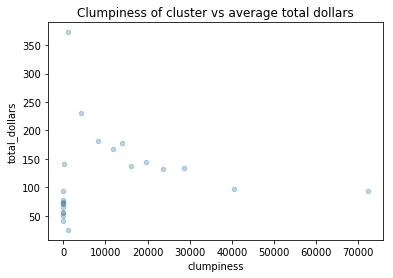

In [14]:
ax = summary.groupby("cluster").agg({
    "clumpiness": "mean",
    "total_dollars": "mean"
}).plot(x="clumpiness", y="total_dollars", kind="scatter", alpha=0.3)

ax.set_title("Clumpiness of cluster vs average total dollars")

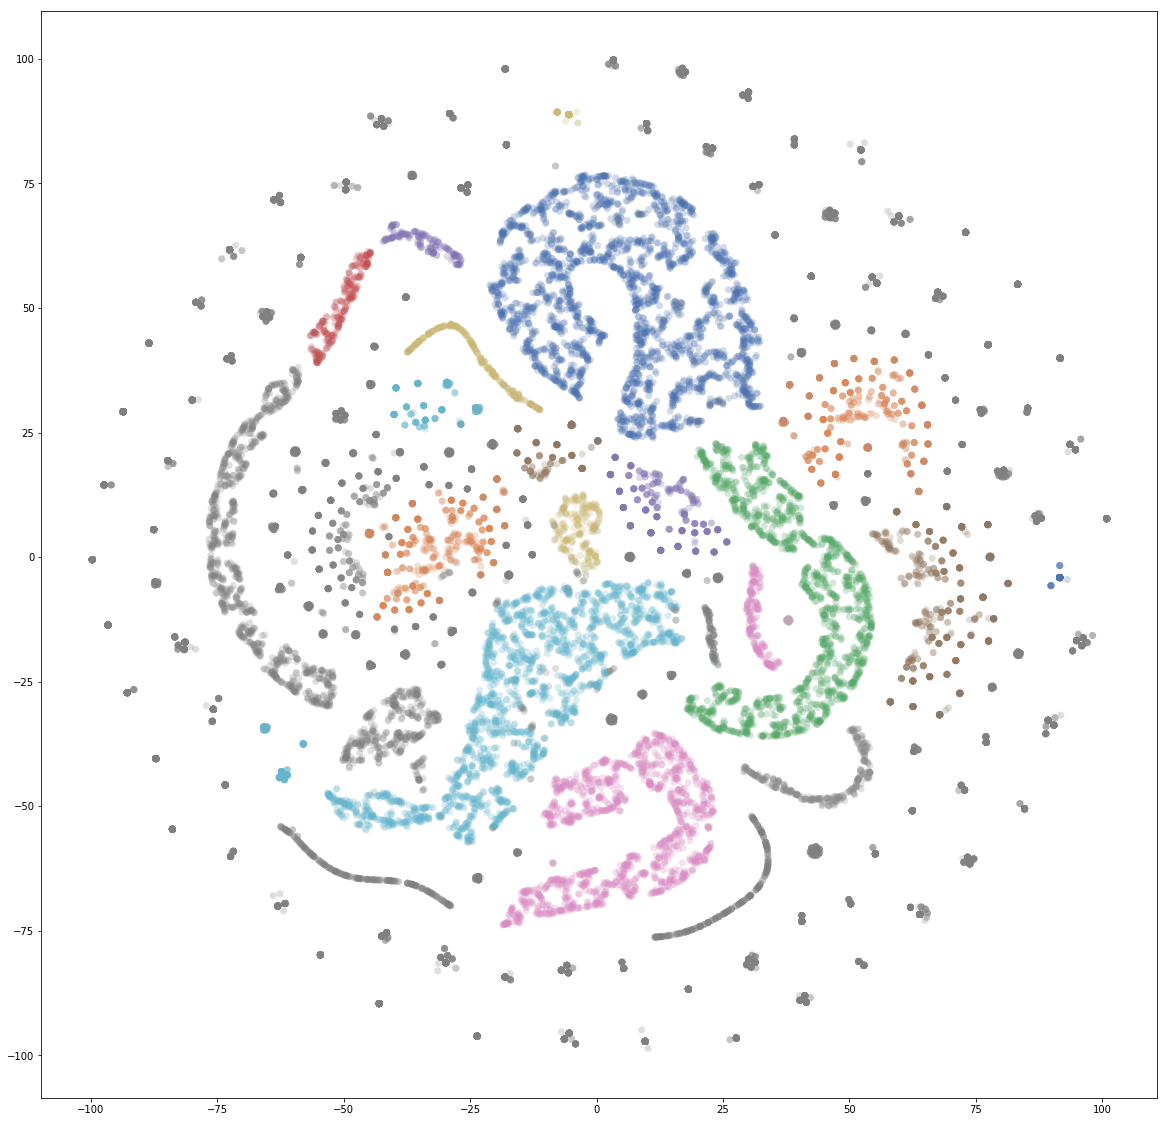

In [20]:
def get_colour(index):
    if summary.iloc[index].frequency == 1.0:
        return (0.5, 0.5, 0.5)
    if index >= 16:
        return color_palette[index]
    else:
        return (0.5, 0.5, 0.5)
            

color_palette = sns.color_palette("deep", 42)
cluster_colors = [get_colour(x)
                  for x in clusterer.labels_]
cluster_member_colors = [sns.desaturate(x, p) for x, p in
                         zip(cluster_colors, clusterer.probabilities_)]

fig, ax = plt.subplots(1, figsize=(20, 20))
ax.scatter(*projection.T, s=50, linewidth=0, c=cluster_member_colors, alpha=0.25)



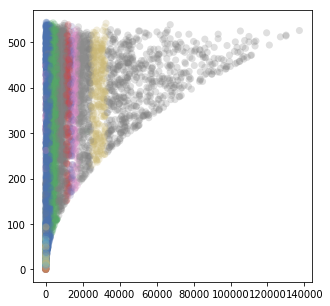

In [21]:
fig, ax = plt.subplots(1, figsize=(5, 5))
ax.scatter(summary.clumpiness, summary.tenure, s=50, linewidth=0, c=cluster_member_colors, alpha=0.25)
